## Problem Set 2

This problem set will focus on setting up and solving integer linear programming problems. Before starting this problem, we assume that you have already studied the tutorial on setting up  integer linear programming problems in pulp.

In [ ]:
# Important: please run this cell before working on the rest of the notebook
from pulp import *

## Problem 1

In this problem, you will setup and solve the three coloring problem as a integer linear programming problem.

The three coloring problem inputs an undirected graph $G$ with vertices $V = \{ 0, \ldots, n-1\}$ and undirected edges $E$. We are looking to color each vertex one of three colors red, green or blue such that for any edge 
$(i, j)$ the nodes $i, j$ have different colors. 

Given a graph, we wish to know if a three coloring is possible and if so, we wish to find the three coloring. Although this problem seems like a toy problem, it has applications to many practical problems in resource allocation and other areas. 


First, we ask you to setup the three coloring problem as an integer linear program.

### Decision variables

For each vertex $i \in V$, we will use three decision variables $x_i^R, x_i^G$ and $x_i^B$ that 
indicate whether the vertex if colored red, green or blue, respectively. Note that these are all 
_binary_ variables taking on $0, 1$ values.


### (A) Each vertex can take just one color

Write down a constraint that says that each vertex must be colored exactly one of three colors: red, green or blue in terms of $x_i^R, x_i^G$ and $x_i^B$.



YOUR ANSWER HERE

### (B) Adjacent vertices cannot be the same color.

Write down constraints for each edge $(i, j) \in E$ that they  cannot be the same color. **Hint** Write down three constraints that express that the vertices $i,j$ cannot both be green, cannot both be red and cannot both be blue respectively. Translate these requirements into constraints involving $x_i^G, x_j^G$,  $x_i^R, x_j^R$ and 
$x_i^B, x_j^B$.


YOUR ANSWER HERE

Write a function `encodeAndSolveThreeColoring(n, edge_list)` that given the number of vertices $n \geq 1$ and the list of edges as a list of pairs of vertices `[ (i1, j1), (i2, j2) ..., (im, jm) ] ` returns a tuple  `(flag, color_assignment)` consisting of boolean `flag` and a list `color_assignment`, wherein 
   - `flag` is `True` if the graph is three colorable and `False` if not.
   - `color_assignment` is a list of n colors `r`, `g`, or `b` (standing for red, green or blue) where the $i^{th}$ element of the list stands for the color assigned to vertex $i$.
   
 Note that the `color_assignment` component of the return value is ignored if `flag` is set to `False`.

In [ ]:
from pulp import *

def encode_and_solve_three_coloring(n, edge_list):
    assert n >= 1, 'Graph must have at least one vertex'
    assert all( 0 <= i and i < n and 0 <= j and j < n and i != j for (i,j) in edge_list ), 'Edge list is not well formed'
    prob = LpProblem('Three Color', LpMinimize)
    #1. Formulate the decision variables
    #2. Add the constraints for each vertex and edge in the graph.
    #3. Solve and interpret the status of the solution.
    #4. Return the result in the required form to pass the tests below.
    # your code here
    raise NotImplementedError
    

In [ ]:
n = 4
edge_list = [(0,1), (0, 2), (0,3), (1, 3), (2,3)]
(flag, color_assign) = encode_and_solve_three_coloring(n, edge_list)
assert flag == True, 'Error: Graph is three colorable but your code wrongly returns flag = False'
print(f'Three color assignment: {color_assign}')
def check_three_color_assign(n, edge_list, color_assign):
    assert len(color_assign) == n, f'Error: The list of color assignments has {len(color_assign)} entries but must be same as number of vertices {n}'
    assert all( col == 'r' or col == 'b' or col == 'g' for col in color_assign), f'Error: Each entry in color assignment list must be r, g or b. Your code returned: {color_assign}'
    for (i, j) in edge_list:
        ci = color_assign[i]
        cj = color_assign[j]
        assert ci != cj, f' Error: For edge ({i,j}) we have same color assignment ({ci, cj})'
    print('Success: Three coloring assignment checks out!!')
        
check_three_color_assign(n, edge_list, color_assign)
print('Passed: 10 points!')

In [ ]:
n = 4
edge_list = [(0,1), (0, 2), (0,3), (1,2), (1, 3), (2,3)]
(flag, color_assign) = encode_and_solve_three_coloring(n, edge_list)
assert flag == False, 'Error: Graph is NOT three colorable but your code wrongly returns flag = True'
print('Passed: 5 points!')

In [ ]:
n = 9
edge_list = [ (0, 4), (0, 6), (0, 8), (1, 3), (1, 4), (1, 8), (2, 3), (2, 5), (2,6), (2,7), (3, 4), (3,5), (3,6), (3,8),(4,5), (4,6),(5,7),(6,8),(7,8)]
(flag, color_assign) = encode_and_solve_three_coloring(n, edge_list)
assert flag == True, 'Error: Graph is three colorable but your code wrongly returns flag = False'
print(f'Three color assignment: {color_assign}')
def check_three_color_assign(n, edge_list, color_assign):
    assert len(color_assign) == n, f'Error: The list of color assignments has {len(color_assign)} entries but must be same as number of vertices {n}'
    assert all( col == 'r' or col == 'b' or col == 'g' for col in color_assign), f'Error: Each entry in color assignment list must be r, g or b. Your code returned: {color_assign}'
    for (i, j) in edge_list:
        ci = color_assign[i]
        cj = color_assign[j]
        assert ci != cj, f' Error: For edge ({i,j}) we have same color assignment ({ci, cj})'
    print('Success: Three coloring assignment checks out!!')
        
check_three_color_assign(n, edge_list, color_assign)
print('Passed: 5 points!')

## Problem 2

Imagine you are operating a bunch of grocery stores across the country with $n$ store locations numbered $0, \ldots, n-1$ wherein each location $i$ has coordinates $(x_i, y_i)$. The travel distance between locations $i$ and $j$ is given by $d_{i,j} = \sqrt{ (x_i - x_j)^2 + (y_i - y_j)^2 } $ (the Euclidean distance). 

You are asked to locate warehouses among these $n$ locations so that for each location $j$, the distance to the closest warehouse is less than some specified limit $R \geq 0$. Of course, you need to minimize the number of warehouses since warehouses are expensive to create and operate.


In this problem, we will formulate an integer linear program that will solve the problem of finding the minimum number or warehouses and their locations given inputs:
  - $[ (x_0, y_0), \ldots, (x_{n-1}, y_{n-1}) ]$: the list of coordinates of the locations;
  - $R > 0$ : the acceptable distance limit from each location to its nearest warehouse.


### Example

Consider the following data for the locations:

$$\begin{array}{ll}
\text{Loc.} & \text{Coord} \\ 
\hline
0 & (1, 1) \\ 
1 & (1, 2) \\ 
2 & (2, 3) \\ 
3 & (1, 4) \\ 
4 & (5, 1) \\ 
5 & (3, 3) \\ 
6 & (4, 4) \\ 
7  & (1,6) \\ 
8 & (0,3) \\ 
9 & (3,5)\\
10 & (2,4)\\ 
\end{array}$$

Suppose we wanted to have $R = 2$ as the distance limit. The optimal solution is to choose locations
$1, 4, 6, 7$ as the warehouse locations. We show below the four circles of radius $2$ around the 
chosen locations. Notice that they cover all the points in our dataset.

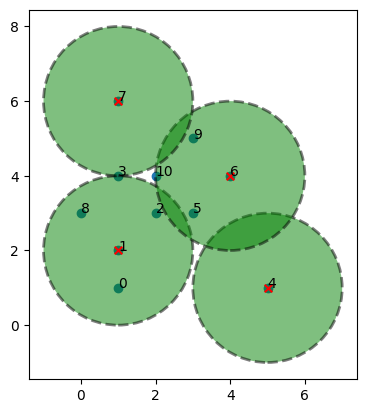



However, no set of three warehouse locations will cover all points for $R = 2$. Suppose we chose the locations
$3, 5, 9$ for our warehouse locations, notice that there are uncovered locations.
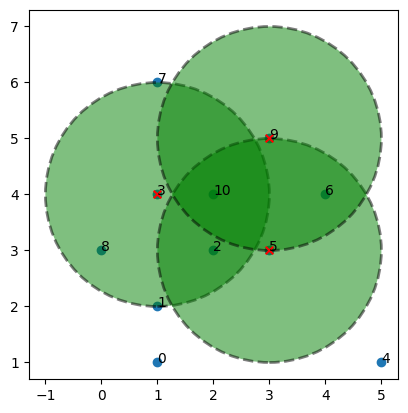

Let's begin to formulate an ILP to compute the minimum number of warehouses.

# (A) Identifying Decision Variables

We will have binary decision variable $w_i$ corresponding to each location $i \in \{ 0, \ldots, n-1\}$ wherein 

$$ w_i = \begin{cases} 1, & \text{if we locate a warehouse at location}\ i \\ 0, & \text{otherwise} \\ \end{cases}$$

### (B) Objective function

Express the number of warehouses created in terms of the decision variables $w_0, \ldots, w_{n-1}$. This will give us the objective that we will minimize.


YOUR ANSWER HERE

## (C) Constraints

Let's consider from the point of view of each location $j$ in our list. We would like at least one warehouse to be located at a location $i$ where $d_{i,j} \leq R$. 

Define the set  $D_j = \{ i \ |\ d_{i,j} \leq R \}$ to be all locations within distance $R$ from $j$ (this set includes $j$ as well since $d_{j,j} = 0$).

Write down the constraint that at least one warehouse must be located  among the locations in the set $D_j$.

YOUR ANSWER HERE

### (D) Formulate and solve the ILP given data.

Write a function `solve_warehouse_location(location_coords, R)` wherein `location_coords` is a list of coordinates
$[(x_0,y_0), \ldots, (x_{n-1},y_{n-1})]$ and $R > 0$ is the distance limit.  For your convenience, the `euclidean_distance` between two points is implemented. Setup and solve the ILP using PULP.

Your code should return a list of indices $[i_1, i_2, ..., i_k]$ which are the optimal locations for the warehouses to be located minimizing the number of warehouses and ensuring that every point is within distance $d$ of a warehouse.

In [ ]:
from pulp import *
from math import sqrt 

def euclidean_distance(location_coords, i, j):
    assert 0 <= i and i < len(location_coords)
    assert 0 <= j and j < len(location_coords)
    if i == j: 
        return 0.0
    (xi, yi) = location_coords[i] # unpack coordinate
    (xj, yj) = location_coords[j]
    return sqrt( (xj - xi)**2 + (yj - yi)**2 )

    
def solve_warehouse_location(location_coords, R):
    assert R > 0.0, 'radius must be positive'
    n = len(location_coords)
    prob = LpProblem('Warehouselocation', LpMinimize)
    #1. Formulate the decision variables
    #2. Add the constraints for each vertex and edge in the graph.
    #3. Solve and interpret the status of the solution.
    #4. Return the result in the required form to pass the tests below.
    # your code here
    raise NotImplementedError
    

In [ ]:
from matplotlib import pyplot as plt 

def check_solution(location_coords, R, warehouse_locs):
    # for each location i, calculate all locations j within distance R of location i
    # use list comprehension instead of accumulating using a nested for loop.
    n = len(location_coords)
    assert all(j >= 0 and j < n for j in warehouse_locs), f'Warehouse locations must be between 0 and {n-1}'
    neighborhoods = [ [j for j in range(n) if euclidean_distance(location_coords, i, j) <= R] for i in range(n)]
    W = set(warehouse_locs)
    for (i, n_list)  in enumerate(neighborhoods):
        assert any(j in W for j in n_list), f'Location # {i} has no warehouse within distance {R}. The locations within distance {R} are {n_list}'
    print('Your solution passed test')
    
def visualize_solution(location_coords, R, warehouse_locs):
    n = len(location_coords)
    (xCoords, yCoords) = zip(*location_coords)
    warehouse_x, warehouse_y = [xCoords[j] for j in warehouse_locs], [yCoords[j] for j in warehouse_locs]
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    plt.scatter(xCoords, yCoords)
    for j in warehouse_locs: 
        circ = plt.Circle(location_coords[j], R, alpha=0.5, color='g',ls='--',lw=2,ec='k')
        ax.add_patch(circ)
    
    for i in range(n):
        (x,y) = location_coords[i]
        ax.annotate(f'{i}', location_coords[i])
    
    plt.scatter(warehouse_x, warehouse_y, marker='x',c='r', s=30)
        
    
    
    
location_coords = [(1,2), (3, 5), (4, 7), (5, 1), (6, 8), (7, 9), (8,14), (13,6)]
R = 5
locs = solve_warehouse_location(location_coords, R )
print(f'Your code returned warehouse locatitons: {locs}')
assert len(locs) <= 4, f'Error: There is an solution involving just 4 locations whereas your code returns {len(locs)}'
visualize_solution(location_coords, R, locs)


check_solution(location_coords, R, locs)

In [ ]:
from matplotlib import pyplot as plt 

def check_solution(location_coords, R, warehouse_locs):
    # for each location i, calculate all locations j within distance R of location i
    # use list comprehension instead of accumulating using a nested for loop.
    n = len(location_coords)
    assert all(j >= 0 and j < n for j in warehouse_locs), f'Warehouse locations must be between 0 and {n-1}'
    neighborhoods = [ [j for j in range(n) if euclidean_distance(location_coords, i, j) <= R] for i in range(n)]
    W = set(warehouse_locs)
    for (i, n_list)  in enumerate(neighborhoods):
        assert any(j in W for j in n_list), f'Location # {i} has no warehouse within distance {R}. The locations within distance {R} are {n_list}'
    print('Your solution passed test')
    
def visualize_solution(location_coords, R, warehouse_locs):
    n = len(location_coords)
    (xCoords, yCoords) = zip(*location_coords)
    warehouse_x, warehouse_y = [xCoords[j] for j in warehouse_locs], [yCoords[j] for j in warehouse_locs]
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    plt.scatter(xCoords, yCoords)
    for j in warehouse_locs: 
        circ = plt.Circle(location_coords[j], R, alpha=0.5, color='g',ls='--',lw=2,ec='k')
        ax.add_patch(circ)
    
    for i in range(n):
        (x,y) = location_coords[i]
        ax.annotate(f'{i}', location_coords[i])
    
    plt.scatter(warehouse_x, warehouse_y, marker='x',c='r', s=30)
        
    
    
    
location_coords = [(1,1), (1, 2), (2, 3), (1, 4), (5, 1), (3, 3), (4,4), (1,6), (0,3), (3,5), (2,4)]

## TEST 1
R = 2
print("R = 2 Test:")
locs = solve_warehouse_location(location_coords, R )
print(f'Your code returned warehouse locatitons: {locs}')
assert len(locs) <= 4, f'Error: There is an solution involving just 4 locations whereas your code returns {len(locs)}'
visualize_solution(location_coords, R, locs)
check_solution(location_coords, R, locs)
print('Test with R= 2 has passed')
## TEST 2
print("R=3 Test:")
R = 3
locs3 = solve_warehouse_location(location_coords, R )
print(f'Your code returned warehouse locatitons: {locs3}')
assert len(locs3) <= 2, f'Error: There is an solution involving just 4 locations whereas your code returns {len(locs)}'
visualize_solution(location_coords, R, locs3)
check_solution(location_coords, R, locs3)
print("Test with R = 3 has passed.")


## That's all folks